In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from warnings import filterwarnings
filterwarnings('ignore')
%matplotlib inline

/home/domenico/snap/jupyter/common/lib/python3.7/site-packages/joblib/_multiprocessing_helpers.py:45: UserWarning: [Errno 13] Permission denied.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))


In [2]:
df = pd.read_csv('housing.csv')
df_ = df.copy()

In [3]:
df.shape

(20640, 10)

In [4]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
df.isna().sum().sort_values(ascending=False)

total_bedrooms        207
ocean_proximity         0
median_house_value      0
median_income           0
households              0
population              0
total_rooms             0
housing_median_age      0
latitude                0
longitude               0
dtype: int64

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


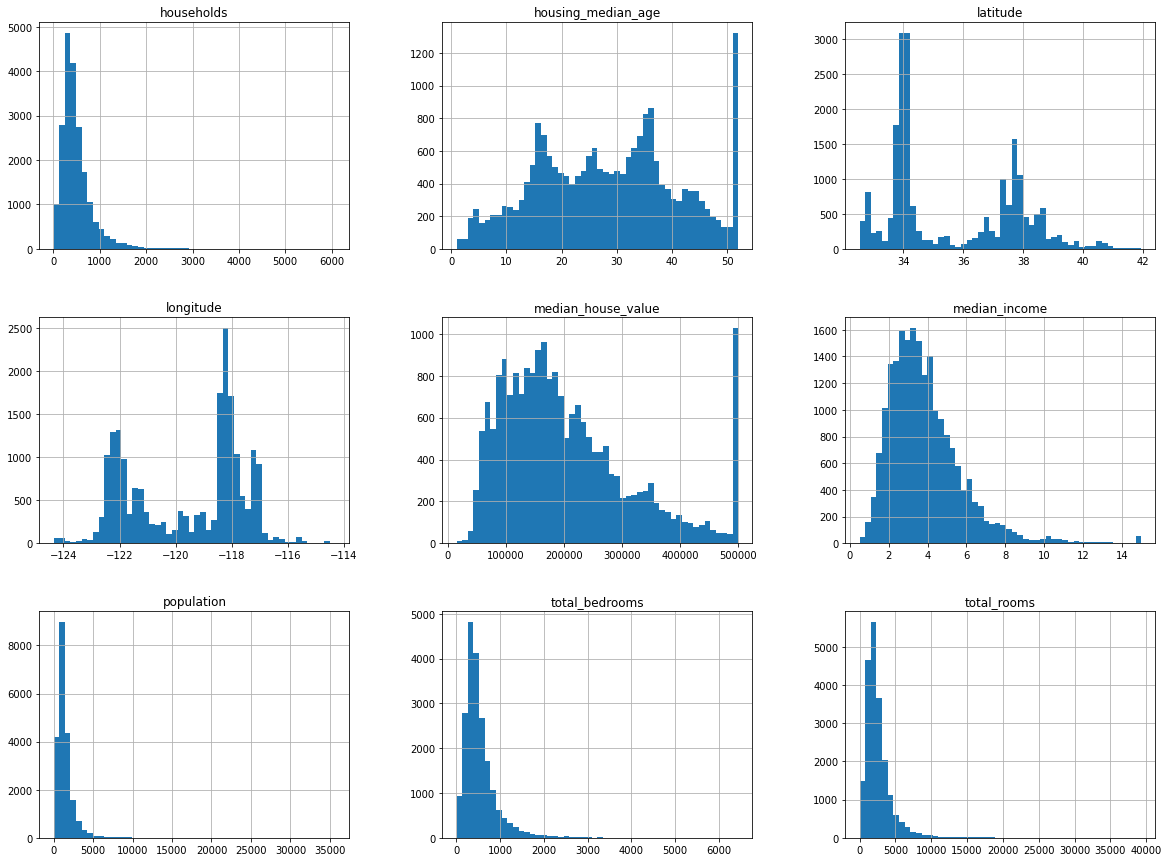

In [8]:
df.hist(bins=50, figsize=(20,15))
plt.show()

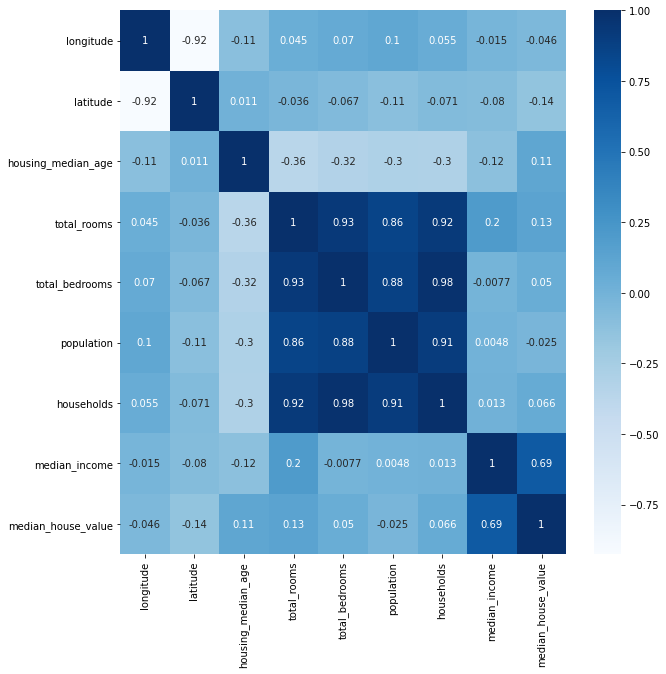

In [9]:
corr = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap='Blues')
plt.show()

median_house_value and median_income are highly correlated.

### Create  a Training and Test df: stratified split of the original df.
For not income in **data snooping bias**  


<AxesSubplot:title={'center':'median_income'}>

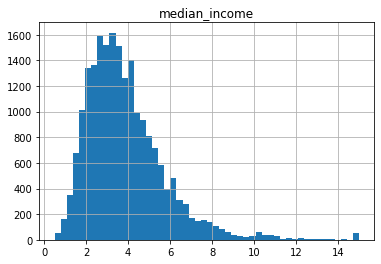

In [10]:
plt.title('median_income')
df['median_income'].hist(bins=50)

Se guardiamo al'istogramma dell'attributo median income, possiamo notare che la maggior parte dei valori va da 1.5 a 6 ($15.000 - $60.000), ma alcuni valori si allontanano da 6. È importante avere un numero sufficiente di istanze nel dataset per ogni strato, altrimenti si potrebbero avere problemi di distorsione (bias). Non è necessario avere tante stratificazioni, ma è indispensabile che ognuna di loro contenga abbastanza dati.  

Tramite la funzione pd.cut(), vado a creare una nuova colonna con 5 categorie (nominate da 1 a 5):  
1 --> [0, 1.5)  
2 --> [1.5, 3.0)  
3 --> [3.0, 4.5)  
4 --> [4.5, 6.0)  
5 --> [6.0, inf)

In [11]:
df['income_cat'] = pd.cut(df['median_income'],
                          bins = [0., 1.5, 3.0, 4.5, 6., np.inf],
                          labels = [1, 2, 3, 4, 5])

In [12]:
strat_train_df, strat_test_df = train_test_split(df, test_size=0.2, stratify=df['income_cat'], random_state=42)

In [13]:
#remove the income_cat category so the data is back to its original state
strat_test_df.drop('income_cat', inplace=True, axis=1)
strat_train_df.drop('income_cat', inplace=True, axis=1)

In [14]:
#dataframe di training
strat_train_df.shape

(16512, 10)

In [15]:
#dataframe di test
strat_test_df.shape

(4128, 10)

---

## Discover and Visualize the Data to Gain Insights

Da ora in poi lavoreremo solo con lo **strat_train_df**

In [16]:
housing = strat_train_df.copy()

### Visualizing Georaphical Data

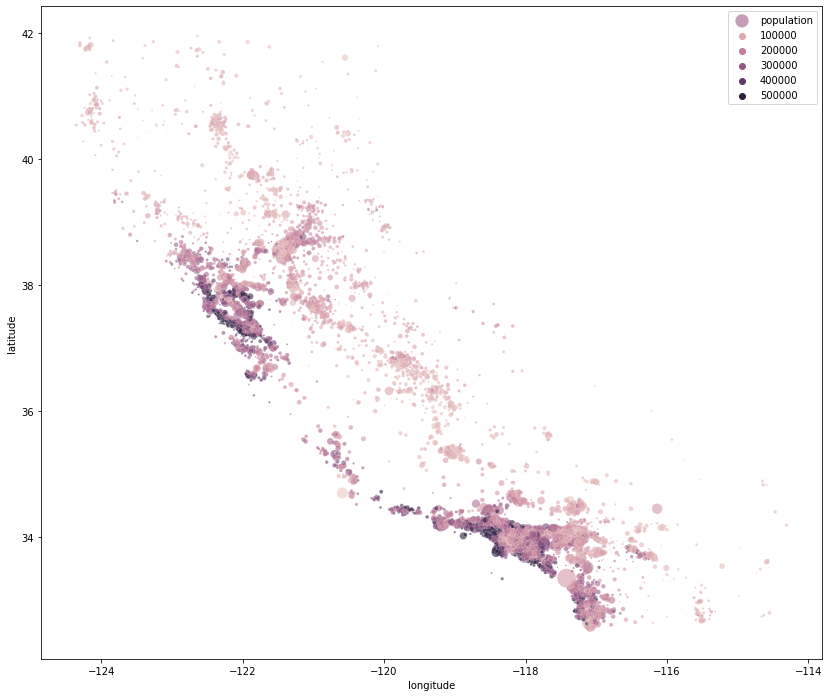

In [17]:
sns.set_palette("tab10")
plt.figure(figsize=(14,12))
sns.scatterplot(x="longitude", y="latitude", data=housing,
                s=housing["population"]/100, alpha=0.6,
                hue="median_house_value", label="population")
plt.legend()

L'immagine ci racconta che il prezzi delle case sono molto correlati con la location (ex. vicino oceano) ed alla densità di popolazione.  

### Looking for correlations

In [18]:
corr_matrix = housing.corr()

In [19]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

**!!! La correlazione misura solo le correlazioni lineari. Bisogna fare attenzione a questo particolare in quanto potrebbero esserci delle relazioni non lineari tra le variabili. Per esempio correlazione pari a 0 significa che non c'è relazione lineare, ma potrebbe esserci un altro tipo di relazione?**

Come già visto, la variabile "median_house_value" è strettamente correlata con "median_income"

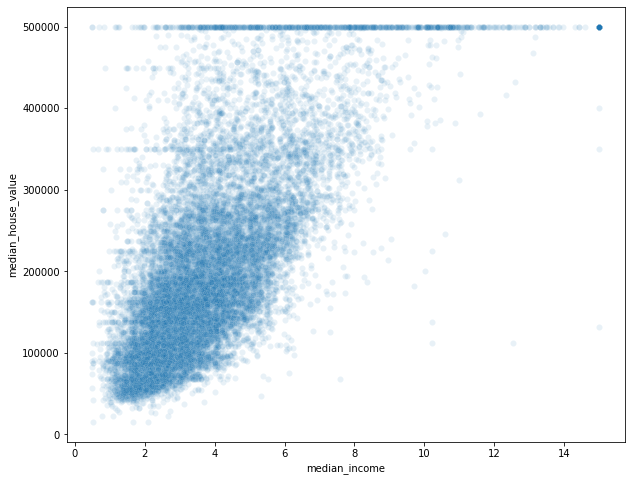

In [20]:
plt.figure(figsize=(10,8))
sns.scatterplot(x="median_income", y="median_house_value", data=housing, alpha=0.1)
plt.show()

Come si può notare, la figura presenta delle linee orizzontali in corrispondenza di "median_value" pari a $450.000, $350.000, $280.000 e altre al di sotto. Si potrebbe pensare di rimuovere il distretto corrispondente per evitare che l'algoritmo apprenda e riproduca questi **data quirks**

### Experimenting with attribute correlations

L'ultima cosa che si potrebbe fare prima di preparare i dati per gli algoritmi di Machine Learning è provare varie combinazioni tra gli attributi.  
Per esempio conoscere il numero totale di stanze in un distretto non è molto utile se non si conosce il numero di famiglie residenti in esso. Quello che a noi interessa è il numero di stanze per famiglia.  
Allo stesso modo, il numero di camere da letto andrebbe comparato al numero di stanze.  
E la popolazione per famiglia sembrerebbe interessante.


In [21]:
housing["rooms_per_households"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["populatio_per_household"] = housing["population"]/housing["households"]

Guardiamo se ci sono novità importanti nella matrice di correlazione

In [22]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value         1.000000
median_income              0.687160
rooms_per_households       0.146285
total_rooms                0.135097
housing_median_age         0.114110
households                 0.064506
total_bedrooms             0.047689
populatio_per_household   -0.021985
population                -0.026920
longitude                 -0.047432
latitude                  -0.142724
bedrooms_per_room         -0.259984
Name: median_house_value, dtype: float64

Il nuovo attributo bedrooms_per_room è molto più correlato rispetto agli attributi originali "rooms" e "bedrooms". Sembra che al diminuire del rapporto (#_camere_letto / #camere), il prezzo tenda ad aumentare.  
Cercare corrlazioni nascoste potrebbe migliorare il nostro modello.  
Questo è un processo iterativo: una volta che si ha a disposizione un prototipo, si potrebbero analizzare gli output per guadagnare altre informazioni e ritornare a cercare ulteriori correlazioni nascoste.

# Prepare the Data for Machine Learning Algorithms

**Usiamo il strat_train_df pulito**

In [23]:
strat_train_df_ = strat_train_df.copy()

In [24]:
housing = strat_train_df_.drop("median_house_value", axis=1)
label = strat_train_df_["median_house_value"]

### Data cleaning

features.isna()

features.dtypes

**Split features in numerical and categorical values**

features_num = features.select_dtypes(include=["float64", "int64"])

si = SimpleImputer(strategy="median")

X = si.fit_transform(features_num)

features_num_tr = pd.DataFrame(X, columns=features_num.columns)

---

features_cat = features.select_dtypes(include="object")

features_cat["ocean_proximity"].unique()

ohe = OneHotEncoder(drop="first", sparse=False, dtype=int)

features_cat_tr = ohe.fit_transform(features_cat)

ohe.categories_

---

### Feature Scaling

**N.B. Generalmente non è richiesto scalare la variabile target**  

**!!! GLI SCALERS VANNO FITTATI SOLO SUL TRAINING SET**

**Solo dopo si usano i valori ottenuti per trasformare i set di training, set, nuovi dati**

---

### Transformation Pipelines

È possibile usare le pipeline ed effetuare le trasformazioni in poche righe

In [25]:
housing_num = housing.drop("ocean_proximity", axis=1)
housing_cat = housing[["ocean_proximity"]]

In [26]:
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler())
])

In [27]:
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, list(housing_num.columns)),
        ("cat", OneHotEncoder(dtype=int), list(housing_cat.columns))
])

In [28]:
housing_prepared = full_pipeline.fit_transform(housing)

In [29]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity'],
      dtype='object')

In [30]:
housing_prepared.shape

(16512, 13)

In [31]:
housing_num.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')

---

# Select and Train a Model

### Linear Regression

In [32]:
housing_prepared.shape

(16512, 13)

In [33]:
label.shape

(16512,)

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
lr = LinearRegression()

In [36]:
lr.fit(housing_prepared, label)

LinearRegression()

A QUESTO PUNTO HO UN MODELLO DI REGRESSIONE LINEARE.   
VEDIAMO COME FUNZIONA SU ALCUNE ISTANZE DEL TRAINING SET.

In [37]:
some_data = housing.iloc[:5]
some_labels = label.iloc[:5]

In [38]:
some_data_prepared = full_pipeline.transform(some_data)

In [39]:
print("Predictions:", lr.predict(some_data_prepared))

Predictions: [211574.39523833 321345.10513719 210947.519838    61921.01197837
 192362.32961119]


In [40]:
print("Labels:", list(some_labels))

Labels: [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


FUNZIONA!!!  
LE PREDIZIONI NON SONO MOLTO ACCURATE, C'È UNO SCOSTAMENTO DI CIRCA IL 35% TRA I VALORI OSSERVATI E QUALLI PREVISTI

In [41]:
from sklearn.metrics import mean_squared_error

In [42]:
housing_predictions = lr.predict(housing_prepared)

In [43]:
lr_mse = mean_squared_error(label, housing_predictions)

In [44]:
lr_rmse = np.sqrt(lr_mse)

In [45]:
lr_rmse

69050.98178244587

È presente un errore medio di circa 69.000 $, tanto!!!  
Questo significa che il modello underfitta i dati. Quando questo succede vuol dire che le features non danno abbastanza informazione o che il modello è troppo semplice.  
La strada principale per risolvere il problema dell'underfitting è quella di selezionare un modello più potente oppure aggiungere ulteriori features.

---

### Decision Tree regressor

In [46]:
from sklearn.tree import DecisionTreeRegressor

In [47]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, label)

DecisionTreeRegressor()

Ora che ho addestrato il modello, provo a valutarlo sul set di training

In [48]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(label, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_mse

0.0

!!! Il modello ha **OVERFITTATO** i dati.  
Come abbiamo detto prima, NON TOCCARE IL SET DI TEST FINO A QUANDO NON SEI SICURO DEL MODELLO CHE INTENDI UTILIZZARE.


---

## Better Evaluation Using Cross-Validation

In [49]:
from sklearn.model_selection import cross_val_score

### Decision Tree

In [50]:
scores = cross_val_score(tree_reg, housing_prepared, label,
                         scoring="neg_mean_squared_error", cv=10)

In [51]:
tree_rmse_scores = np.sqrt(-scores)

In [52]:
def display_scores(scores):
    print("Scores", scores, "\n")
    print("Mean",scores.mean(), "\n")
    print("Std Dev", scores.std())

In [53]:
display_scores(tree_rmse_scores)

Scores [66525.53898009 66837.56396809 73618.74476668 69253.8167417
 68638.76651169 75505.8535846  66456.07594644 70463.76569555
 69431.71124658 70251.87713753] 

Mean 69698.37145789558 

Std Dev 2830.9616250363097


### Linear Regression

In [54]:
scores = cross_val_score(lr, housing_prepared, label,
                         scoring="neg_mean_squared_error", cv=10)

In [55]:
lin_rmse_scores = np.sqrt(-scores)

In [56]:
display_scores(lin_rmse_scores)

Scores [67450.42057782 67329.50264436 68361.84864912 74639.88837894
 68314.56738182 71628.61410355 65361.14176205 68571.62738037
 72476.18028894 68098.06828865] 

Mean 69223.18594556303 

Std Dev 2657.2683112776926


Il Decision Tree overfitta così tanto che funziona peggio della regressione lineare.

---

### Random Forest Regressor

In [57]:
from sklearn.ensemble import RandomForestRegressor

In [58]:
forest_reg = RandomForestRegressor()

In [59]:
scores = cross_val_score(forest_reg, housing_prepared, label,
                         scoring="neg_mean_squared_error", cv=10)

In [60]:
forest_rmse_scores = np.sqrt(-scores)

In [61]:
display_scores(forest_rmse_scores)

Scores [47696.47412945 46147.37302787 49462.29373144 50216.7986844
 49118.86117583 53457.32686356 48789.76221406 49783.80404427
 51625.88996558 49426.44175049] 

Mean 49572.502558694134 

Std Dev 1893.963389423326


---

# Fine-Tune Your Model

A questo punto abbiamo una serie di modelli. Ora c'è bisogno di personalizzarli attraverso la scelta dei valori da dare agli iperparametri (TUNING).

### Grid Search

La scelta delle combinazioni degli iperparametri potrebbe essere fatta manualmente ma questo richiederebbe uno sforzo enorme.  
Fortunatamente è presente **GridSearchCV** fa il lavoro al posto nostro.  
Quello che dobbiamo fare è elencare gli iperparametri che vogliamo provare e i valori con cui provarli.

In [62]:
from sklearn.model_selection import GridSearchCV

In [63]:
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 4, 3]}
]

In [64]:
forest_reg = RandomForestRegressor()

In [65]:
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring="neg_mean_squared_error",
                           return_train_score=True)

In [66]:
grid_search.fit(housing_prepared, label)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 4, 3],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [67]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [68]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

---

### Randomized Search

L'approccio **grid search** va bene quando si vuole esploare un numero di combinazioni abbastanza basso, come nell'esempio precedente, ma quando gli iperparametri da analizzare sono molti, conviene utilizzare il **RandomizedGridSearchCV**

---

### Ensamble Methods

Un altro modo di personalizzazione del modello è quello di combinare i modelli che performano meglio. Il gruppo (o 'ensamble') performerà meglio del singolo regressore.

---

# Analyze the Best Models and Their Errors

Spesso si possono ricavare buone informazioni del problema ispezionando i modelli.  
Per esempio il RandomForestRegressor può indicare l'importanza che ogni attributo ha nel fare predizioni:  

In [69]:
features_importances = grid_search.best_estimator_.feature_importances_

In [70]:
features_importances

array([1.14168391e-01, 1.09571717e-01, 4.93225585e-02, 3.58256864e-02,
       3.03469205e-02, 4.32165875e-02, 2.78956597e-02, 4.17382575e-01,
       1.87846830e-02, 1.42977904e-01, 5.77104266e-05, 3.62387320e-03,
       6.82573361e-03])

Mostriamo gli attributi a cui tali valori sono associati

In [71]:
cat_one_hot_attribs = list(full_pipeline.named_transformers_["cat"].categories_[0])

In [73]:
num_attribs = list(housing_num)

In [74]:
attributes = num_attribs + cat_one_hot_attribs

In [75]:
sorted(zip(features_importances, attributes), reverse=True)

[(0.41738257514934196, 'median_income'),
 (0.14297790430187374, 'INLAND'),
 (0.1141683908046666, 'longitude'),
 (0.10957171686614194, 'latitude'),
 (0.04932255850104728, 'housing_median_age'),
 (0.04321658751534481, 'population'),
 (0.03582568638000117, 'total_rooms'),
 (0.03034692054823744, 'total_bedrooms'),
 (0.027895659727791452, 'households'),
 (0.01878468296732056, '<1H OCEAN'),
 (0.006825733612118938, 'NEAR OCEAN'),
 (0.0036238731994893657, 'NEAR BAY'),
 (5.7710426624613195e-05, 'ISLAND')]

Con questa informazione, si può provare a tagliare alcune delle features meno utili.  
Si potrebbe provare a guardare gli errori specifici e provare a correggerli (aggiungendo o rimuovendo features o pulendo gli outliers)

# Evaluate Your System on the Test Set

In [79]:
final_model = grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

In [77]:
X_test = strat_test_df.drop("median_house_value", axis=1)
y_test = strat_test_df["median_house_value"].copy()

In [78]:
X_test_prepared = full_pipeline.transform(X_test)

In [80]:
final_predictions = final_model.predict(X_test_prepared)

In [81]:
final_mse = mean_squared_error(y_test, final_predictions)

In [82]:
final_rmse = np.sqrt(final_mse)

In [83]:
final_rmse

47837.95473216346